Loan Approval Prediction using Logistic regression

1.0 Visualizing the dataset

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
import os
import scipy

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

1.2 Data Preprocessing and Exploration

In [162]:
def print_percentage(df, column):
    total = len(df)
    value_counts = df[column].value_counts(dropna=False)
    for value, count in value_counts.items():
        percentage = (count / total) * 100
        print(f"{value}: {percentage:.2f}%")

In [163]:
df = pd.read_csv("./loan_data_set.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [164]:
df.shape

(614, 13)

1.3 Categorical Variable Exploration

In [165]:
df.Loan_ID.value_counts(dropna=False)

Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64

In [166]:
df.Gender.value_counts(dropna=False)

Gender
Male      489
Female    112
NaN        13
Name: count, dtype: int64

In [9]:
print_percentage(df, 'Gender')

Male: 79.64%
Female: 18.24%
Missing values: 2.12%


/var/folders/52/mdtgs1sn50jd99c9chrgtjm00000gn/T/ipykernel_51847/18202400.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=df, palette="hls")


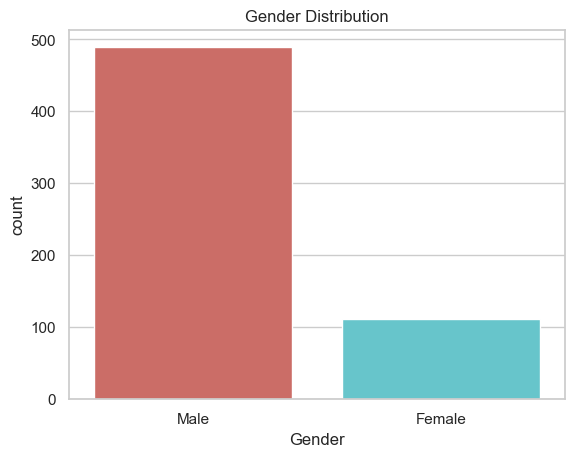

In [167]:
sns.countplot(x="Gender", data=df, palette="hls")
plt.title("Gender Distribution")
plt.show()

In [168]:
df.Married.value_counts(dropna=False)

Married
Yes    398
No     213
NaN      3
Name: count, dtype: int64

/var/folders/52/mdtgs1sn50jd99c9chrgtjm00000gn/T/ipykernel_51847/1847479466.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Married", data=df, palette="hls")


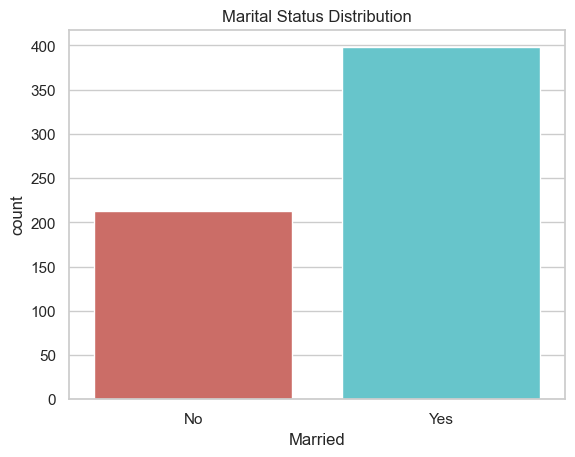

In [169]:
sns.countplot(x="Married", data=df, palette="hls")
plt.title("Marital Status Distribution")
plt.show()

In [170]:
print_percentage(df, 'Married')

Yes: 64.82%
No: 34.69%
nan: 0.49%


In [171]:
df.Education.value_counts(dropna=False)

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

/var/folders/52/mdtgs1sn50jd99c9chrgtjm00000gn/T/ipykernel_51847/3567088262.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Education", data=df, palette="hls")


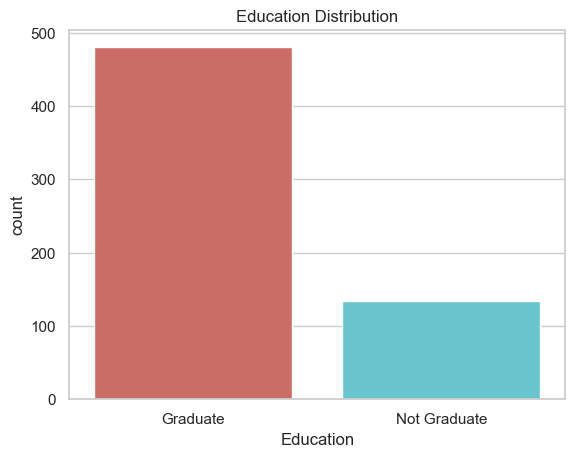

In [172]:
sns.countplot(x="Education", data=df, palette="hls")
plt.title("Education Distribution")
plt.show()

In [173]:
df.Self_Employed.value_counts(dropna=False)

Self_Employed
No     500
Yes     82
NaN     32
Name: count, dtype: int64

/var/folders/52/mdtgs1sn50jd99c9chrgtjm00000gn/T/ipykernel_51847/3016670406.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Self_Employed", data=df, palette="hls")


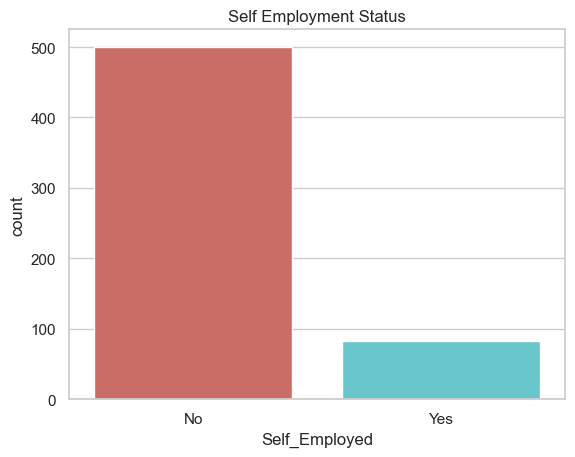

In [174]:
sns.countplot(x="Self_Employed", data=df, palette="hls")
plt.title("Self Employment Status")
plt.show()

In [175]:
df.Credit_History.value_counts(dropna=False)

Credit_History
1.0    475
0.0     89
NaN     50
Name: count, dtype: int64

/var/folders/52/mdtgs1sn50jd99c9chrgtjm00000gn/T/ipykernel_51847/272628725.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Credit_History", data=df, palette="hls")


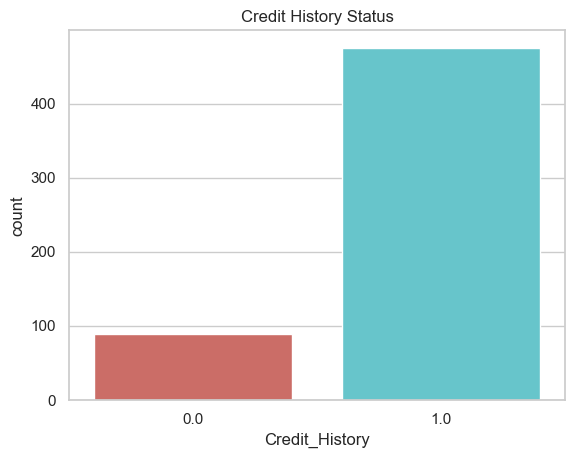

In [176]:
sns.countplot(x="Credit_History", data=df, palette="hls")
plt.title("Credit History Status")
plt.show()

In [177]:
df.Property_Area.value_counts(dropna=False)

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

/var/folders/52/mdtgs1sn50jd99c9chrgtjm00000gn/T/ipykernel_51847/2445913823.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Property_Area", data=df, palette="hls")


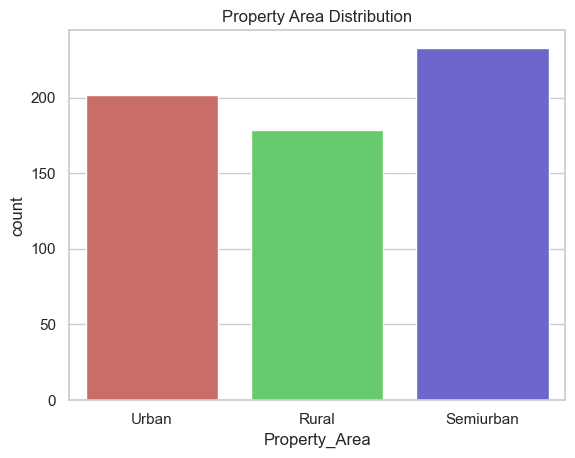

In [178]:
sns.countplot(x="Property_Area", data=df, palette="hls")
plt.title("Property Area Distribution")
plt.show()

In [179]:
df.Loan_Status.value_counts(dropna=False)

Loan_Status
Y    422
N    192
Name: count, dtype: int64

/var/folders/52/mdtgs1sn50jd99c9chrgtjm00000gn/T/ipykernel_51847/2481519382.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Loan_Status", data=df, palette="hls")


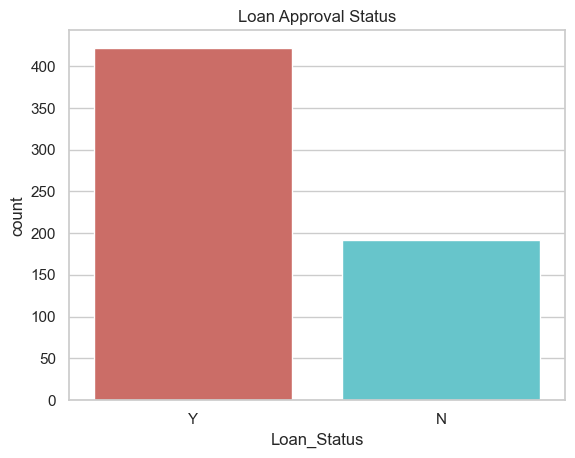

In [180]:
sns.countplot(x="Loan_Status", data=df, palette="hls")
plt.title("Loan Approval Status")
plt.show()

In [181]:
df.Loan_Amount_Term.value_counts(dropna=False)

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [182]:
print_percentage(df, 'Loan_Amount_Term')

360.0: 83.39%
180.0: 7.17%
480.0: 2.44%
nan: 2.28%
300.0: 2.12%
240.0: 0.65%
84.0: 0.65%
120.0: 0.49%
60.0: 0.33%
36.0: 0.33%
12.0: 0.16%


1.4 Numerical Variable

In [183]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


Distribution of Numerical Variable

Histogram Distribution

A histogram is a visualization tool that shows the distribution of a variable by dividing the data into intervals or "bins" and plotting the frequency of values within each bin.

Histograms help identify the distribution (e.g., normal, skewed, uniform) and detect patterns such as outliers or clustering.

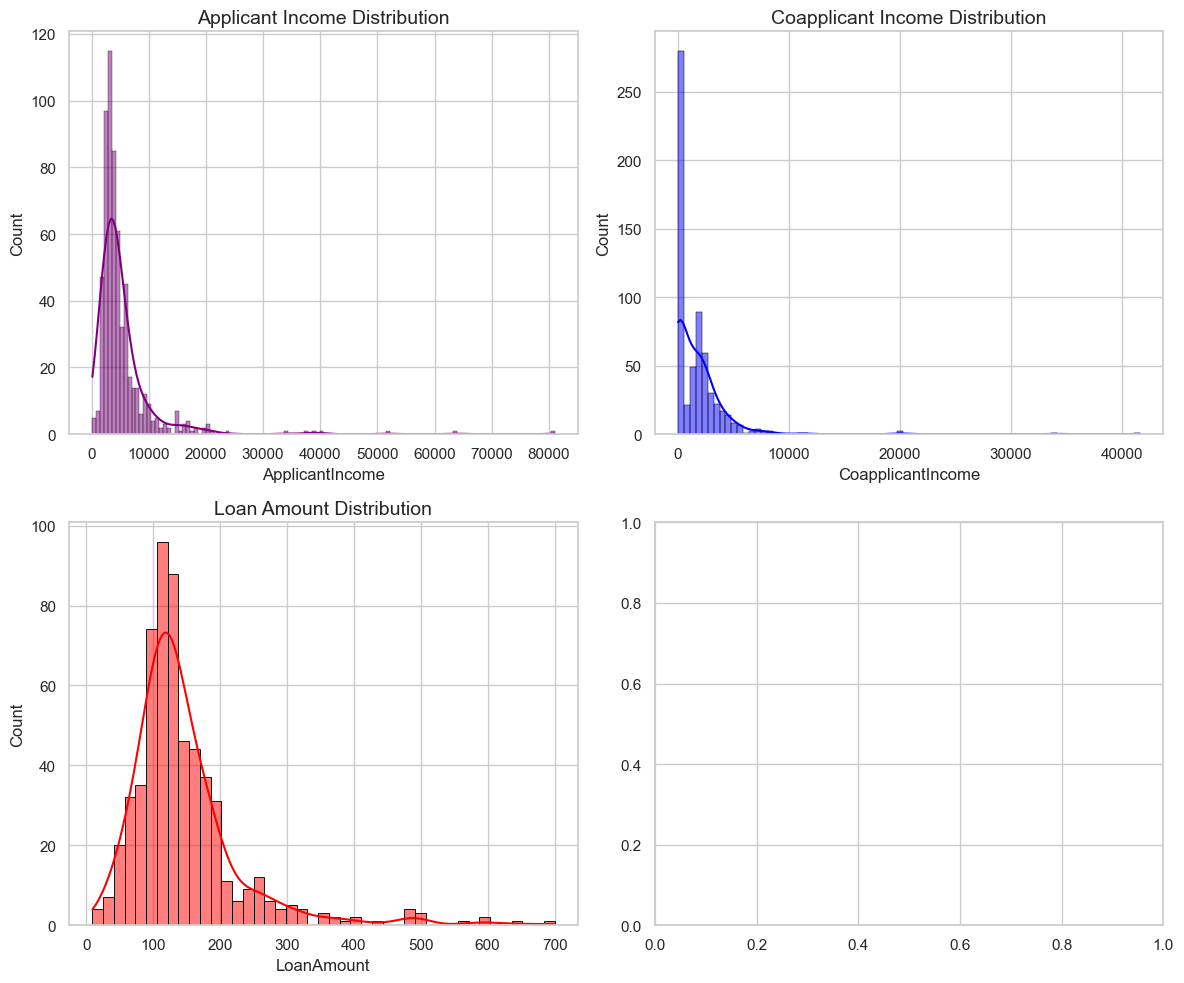

In [184]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='purple', edgecolor='black')
axs[0, 0].set_title('Applicant Income Distribution', fontsize=14)

sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='blue', edgecolor='black')
axs[0, 1].set_title('Coapplicant Income Distribution', fontsize=14)

sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='red', edgecolor='black')
axs[1, 0].set_title('Loan Amount Distribution', fontsize=14)

plt.tight_layout()
plt.show()

Applicant Income, Co Applicant Income, and Loan Amount show a positive skew (long tail on the right).
This indicates that most values are clustered toward the lower end, with fewer observations at the higher end.
The extended tails suggest potential outliers, especially for higher income or loan amounts.


Violin Plot 

A violin plot combines aspects of a box plot and a kernel density plot. It shows both the distribution and summary statistics (e.g., median, interquartile range) of a variable.

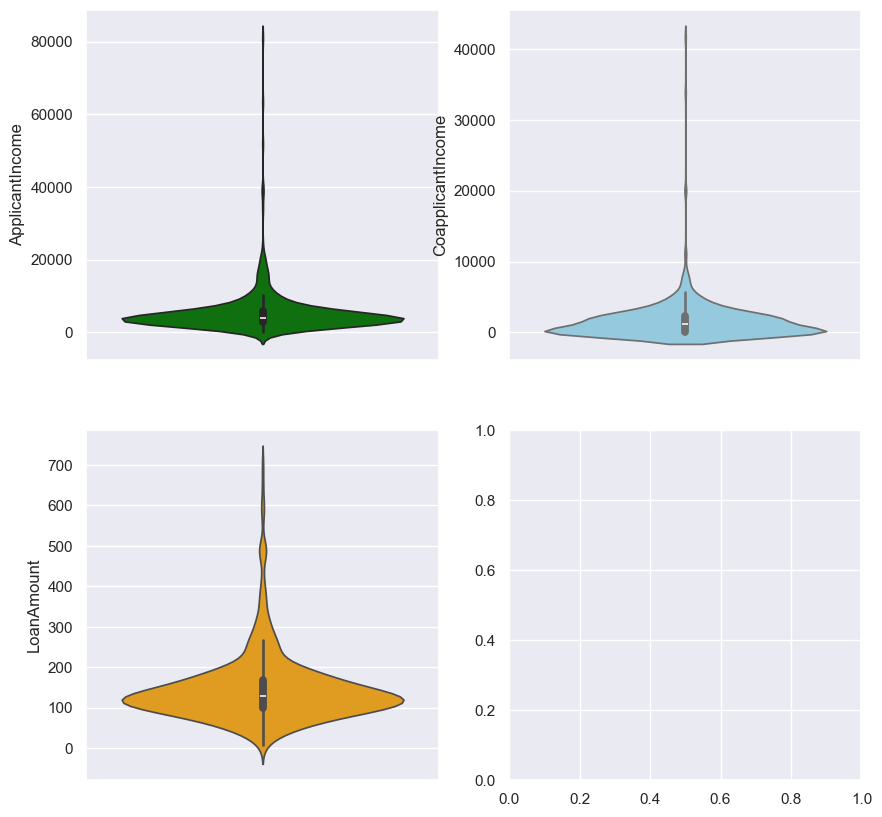

In [185]:
sns.set(style="darkgrid")
fig, axs1 = plt.subplots(2, 2, figsize=(10, 10))

sns.violinplot(data=df, y="ApplicantIncome", ax=axs1[0, 0], color='green')
sns.violinplot(data=df, y="CoapplicantIncome", ax=axs1[0, 1], color='skyblue')
sns.violinplot(data=df, y="LoanAmount", ax=axs1[1, 0], color='orange');

The distributions of Applicant Income, Coapplicant Income, and Loan Amount are positively skewed with outliers, while Loan Amount Term is negatively skewed and contains outliers.

1.5 Null Values / Missing Values

Let’s see how many null values we have

In [186]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

2.0 Data Processing

2.1 Drop Unnecessary Variables

In [187]:
df = df.drop(['Loan_ID'], axis=1)

2.2 Data Imputation
Imputation is a technique for substituting an estimated value for missing values in a dataset. In this section, the imputation will be performed for variables that have missing values.


2.2.1 Categorical Variables

Technique: Mode imputation.
Why: The mode (most frequent value) is used for categorical variables to fill missing values without introducing bias.

In [188]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

/var/folders/52/mdtgs1sn50jd99c9chrgtjm00000gn/T/ipykernel_51847/3994649903.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
/var/folders/52/mdtgs1sn50jd99c9chrgtjm00000gn/T/ipykernel_51847/3994649903.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

In [189]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

2.2.2 Numerical Variables
Technique: Mean imputation.
Why: The mean is used for numerical variables as it provides a central value, reducing bias from missing data.

In [190]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df.isnull().sum()

/var/folders/52/mdtgs1sn50jd99c9chrgtjm00000gn/T/ipykernel_51847/3237819634.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [191]:
df = pd.get_dummies(df)
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,5849,0.0,146.412162,360.0,1.0,False,True,True,False,True,...,False,True,False,True,False,False,False,True,False,True
1,4583,1508.0,128.000000,360.0,1.0,False,True,False,True,False,...,False,True,False,True,False,True,False,False,True,False
2,3000,0.0,66.000000,360.0,1.0,False,True,False,True,True,...,False,True,False,False,True,False,False,True,False,True
3,2583,2358.0,120.000000,360.0,1.0,False,True,False,True,True,...,False,False,True,True,False,False,False,True,False,True
4,6000,0.0,141.000000,360.0,1.0,False,True,True,False,True,...,False,True,False,True,False,False,False,True,False,True


Remove redundant information

In [192]:
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Loan_Status_N'], axis=1)
df.rename(columns={
    'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
    'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
    'Loan_Status_Y': 'Loan_Status'
}, inplace=True)
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,5849,0.0,146.412162,360.0,1.0,True,False,True,False,False,False,True,False,False,False,True,True
1,4583,1508.0,128.000000,360.0,1.0,True,True,False,True,False,False,True,False,True,False,False,False
2,3000,0.0,66.000000,360.0,1.0,True,True,True,False,False,False,True,True,False,False,True,True
3,2583,2358.0,120.000000,360.0,1.0,True,True,True,False,False,False,False,False,False,False,True,True
4,6000,0.0,141.000000,360.0,1.0,True,False,True,False,False,False,True,False,False,False,True,True


In [193]:
df.shape

(614, 17)

2.4 Remove Outliers & Infinite Values
Technique: Interquartile Range (IQR) method.
The Interquartile Range (IQR) method is a statistical technique used to identify and remove outliers
Why: Outliers can negatively impact model performance and skew results.

In [194]:
# Exclude boolean columns for quantile calculation
numeric_df = df.select_dtypes(exclude=['bool'])

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers
df = df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [195]:
df.shape

(396, 17)

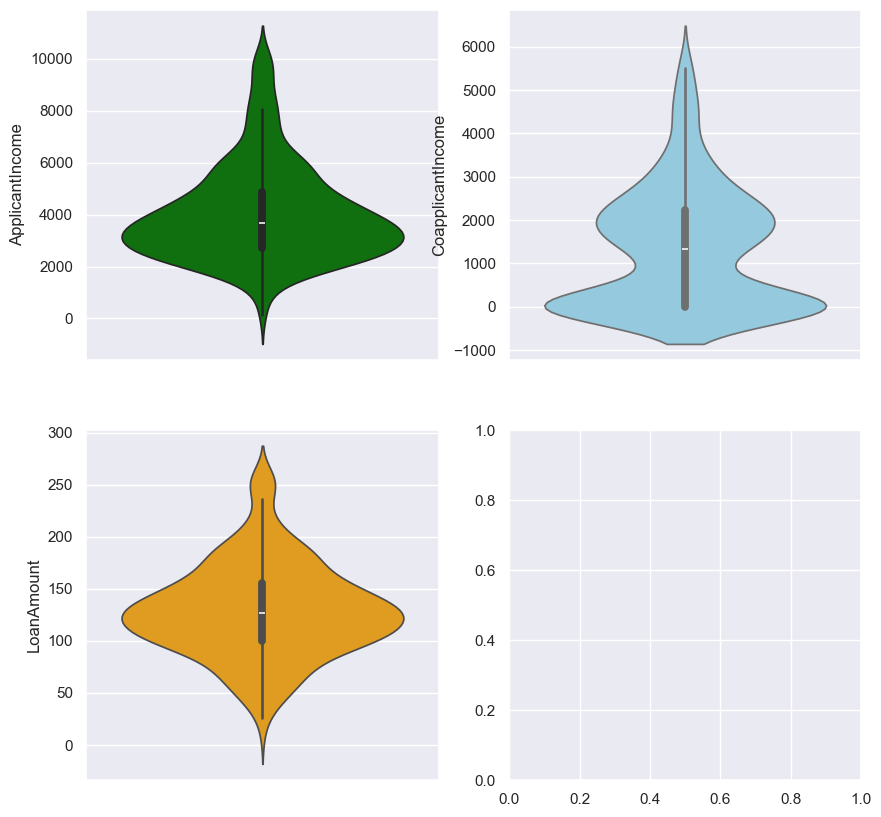

In [196]:
sns.set(style="darkgrid")
fig, axs1 = plt.subplots(2, 2, figsize=(10, 10))

sns.violinplot(data=df, y="ApplicantIncome", ax=axs1[0, 0], color='green')
sns.violinplot(data=df, y="CoapplicantIncome", ax=axs1[0, 1], color='skyblue')
sns.violinplot(data=df, y="LoanAmount", ax=axs1[1, 0], color='orange');

2.5 Skewed Distribution Treatment
Technique: Square root transformation.
Why: To normalize positively skewed distributions for better model performance.


In [211]:
df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)

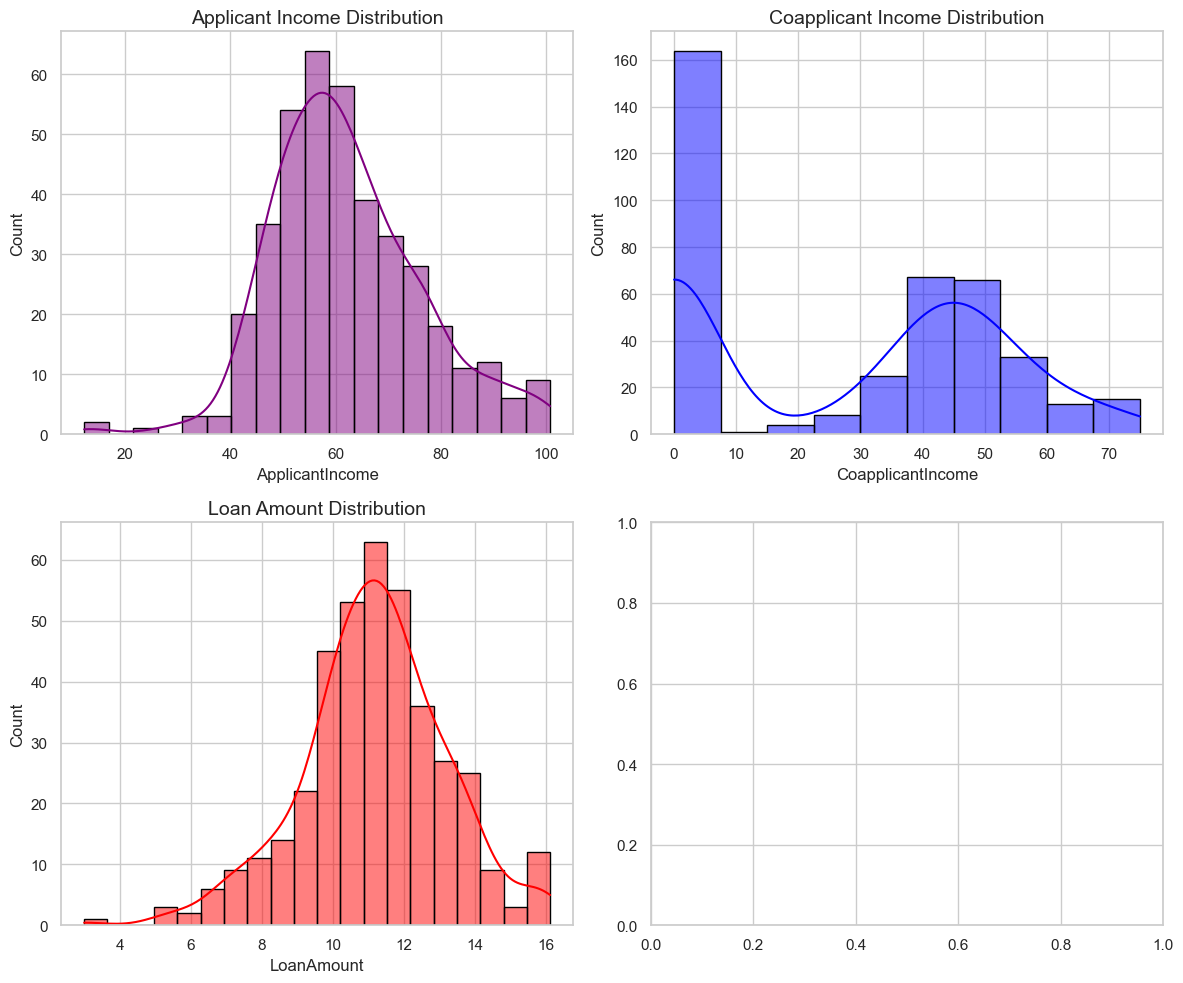

In [198]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='purple', edgecolor='black')
axs[0, 0].set_title('Applicant Income Distribution', fontsize=14)

sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='blue', edgecolor='black')
axs[0, 1].set_title('Coapplicant Income Distribution', fontsize=14)

sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='red', edgecolor='black')
axs[1, 0].set_title('Loan Amount Distribution', fontsize=14)

plt.tight_layout()
plt.show()

2.5 SMOTE Technique
Technique: Synthetic Minority Over-sampling Technique (SMOTE).
SMOTE balances the dataset, ensuring the model is not biased toward the majority class. By generating synthetic data for the minority class using k-nearest neighbor algorithm.
Why: To balance the dataset by oversampling the minority class, reducing bias in model predictions.

Features Separating

In [199]:
X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]

/Users/basliel/projects/ml/life-expectancy-LR/venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/basliel/projects/ml/life-expectancy-LR/venv/lib/python3.9/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/var/folders/52/mdtgs1sn50jd99c9chrgtjm00000gn/T/ipykernel_51847/4032834028.py:2: FutureWarning: 

Passing

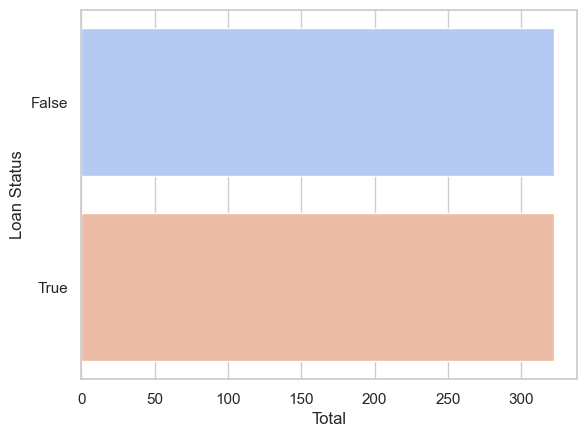

In [200]:
X, y = SMOTE().fit_resample(X, y)
sns.countplot(y=y, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()


In [201]:
X.shape

(644, 16)

2.6 Data Normalization

Technique: Min-max scaling.
Normalization is the process of scaling numerical features to fit within a specific range.
Why: To scale features within a fixed range, improving model convergence and avoid overshadowing

In [202]:
X = MinMaxScaler().fit_transform(X)
X.shape 

(644, 16)

2.8 Splitting Data Set
Splitting into training and testing sets. To evaluate model performance on unseen data.


In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

3.0 Training and Predicting
Let’s first use Logistic regression to train our model
We use it because It is a simple and effective baseline model for binary classification.


In [204]:
model = LogisticRegression(solver='saga', max_iter=600, random_state=1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions[0:10]

array([ True,  True, False,  True, False, False,  True, False,  True,
        True])

In [205]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print('Classification Report:')
print(classification_report(y_test, predictions))

print('Confusion Matrix:')
print(confusion_matrix(y_test, predictions))

LRAcc = accuracy_score(predictions,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))


Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.68      0.79        50
        True       0.74      0.96      0.83        47

    accuracy                           0.81        97
   macro avg       0.84      0.82      0.81        97
weighted avg       0.84      0.81      0.81        97

Confusion Matrix:
[[34 16]
 [ 2 45]]
LR accuracy: 81.44%


K-Nearest Neighbour (KNN)

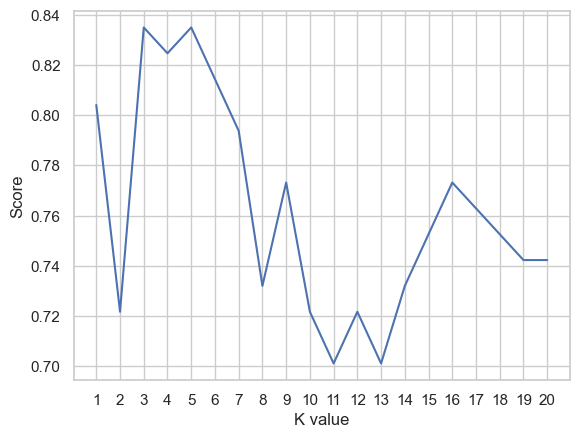

KNN best accuracy: 83.51%


In [206]:
scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))
    
plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

Support Vector Machine (SVM)

In [207]:
SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

       False       0.97      0.64      0.77        50
        True       0.72      0.98      0.83        47

    accuracy                           0.80        97
   macro avg       0.84      0.81      0.80        97
weighted avg       0.85      0.80      0.80        97

[[32 18]
 [ 1 46]]
SVC accuracy: 80.41%


Naive Bayes

In [208]:
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

       False       0.63      0.62      0.63        50
        True       0.60      0.62      0.61        47

    accuracy                           0.62        97
   macro avg       0.62      0.62      0.62        97
weighted avg       0.62      0.62      0.62        97

[[31 19]
 [18 29]]
Gaussian Naive Bayes accuracy: 61.86%


Decision Tree

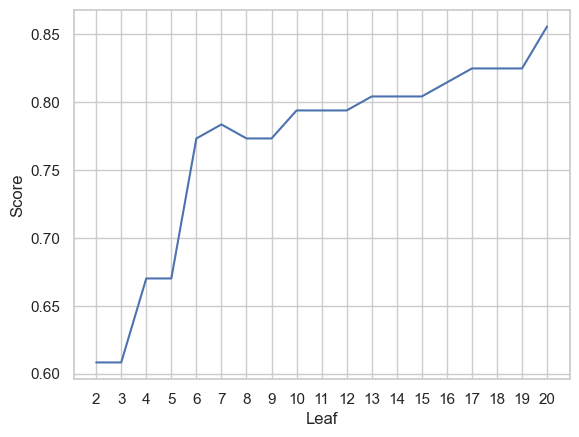

Decision Tree Accuracy: 85.57%


In [209]:
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

Random Forest

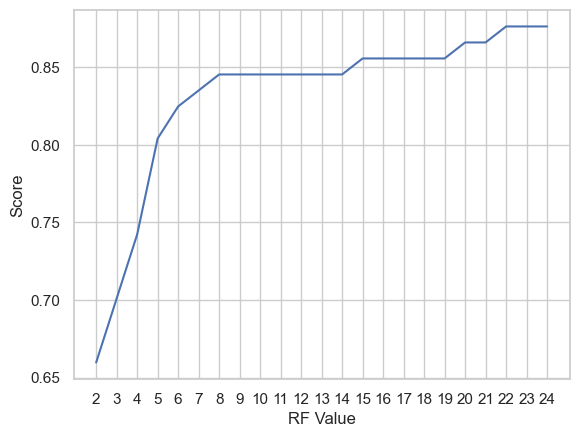

Random Forest Accuracy:  87.63%


In [210]:
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
    
plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))